<a href="https://colab.research.google.com/github/maneesh51/TwitterAnalysis_App/blob/main/Prj5_TwitterSentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Importing libraries



In [ ]:
from textblob import TextBlob

## to handle twotter api
import tweepy
import matplotlib.pyplot as plt
import numpy as np

# import snscrape.modules.twitter as sntwitter


In [ ]:
print(tweepy.__version__)

3.10.0


In [ ]:
consumer_api_key = "lHhuoIVHfKeh0anXYU44dBPnl"
consumer_api_key_secret = "ds85MhwhdTCw1HqNJzTDp6RGjme3QtEU7yU94YyuaTwrBrP7KL"

bearer_token = "AAAAAAAAAAAAAAAAAAAAAM16bgEAAAAAmjQvlB5Cx1ionozswVNx6y9ktNI%3DttLDul66dRCXMU7ZkeKW1M4UBBwq0XTdVoukWLynROljcwIbdk"

client_id = "Nks0bkI0SmJRZHI5MWlmcnFCZU06MTpjaQ"
client_id_secret = "2FLODlmTjSWgAqxdLKs5Dwr8nbexb6v40xWQ0FctMPjfEsD4Pr"

access_token = "3257421576-ZT4Fl19jGVt9MjTDbc7cn9pBUoatJsf0Leefnrs"
access_token_secret = "zNr7SDV3J3LjwVEVTCsyK8XS3kGXxRbW8L6Iy1bAeJNpG"

auth = tweepy.OAuthHandler(consumer_api_key, consumer_api_key_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)
type(api)


tweepy.api.API

In [ ]:
### fetching tweets from this API

search_term = "KGF"
no_of_tweets = 10
tweets = tweepy.Cursor(api.search, q = search_term).items(no_of_tweets)
print(tweets)

In [ ]:
i=0
for tweet in tweets:
  print(i, tweet.text, 'time: ', tweet.created_at, 'Place: ', tweet.place, 'Retweet_count: ', tweet.retweet_count, 'Quoted_tweet: ', tweet.is_quote_status, 'favourite_count: ', tweet.favorite_count, 'favourited: ', tweet.favorited, 'Possibly_sensitive: ', 'lang: ', tweet.lang, '\n')
  i+=1

0 RT @SouthmovieFlix: Most u liked
#KGF2 #KGF #YashBOSS𓃵 #PrasanthNeel #KGFChpater2 time:  2022-04-21 10:58:25 Place:  None Retweet_count:  2 Quoted_tweet:  False favourite_count:  0 favourited:  False Possibly_sensitive:  lang:  en 

1 RT @madan3: One big reason for KGF’s success is it relates to Indian middle class Youngsters! “Dream Big, Take Risk, Win” time:  2022-04-21 10:58:22 Place:  None Retweet_count:  2130 Quoted_tweet:  False favourite_count:  0 favourited:  False Possibly_sensitive:  lang:  en 

2 RT @Get_Suriyafied: Kollywood KGF is on the way❗💥

@Suriya_offl @Sudha_Kongara #VaadiVaasal https://t.co/LmETJQUz1y time:  2022-04-21 10:58:22 Place:  None Retweet_count:  103 Quoted_tweet:  False favourite_count:  0 favourited:  False Possibly_sensitive:  lang:  en 

3 RT @SarcasmPandit: The Mehbooba song from KGF 2 is ❤️ time:  2022-04-21 10:58:21 Place:  None Retweet_count:  0 Quoted_tweet:  False favourite_count:  0 favourited:  False Possibly_sensitive:  lang:  en 

4 @softwa

## How does textblob work example:

#### Polarity is the output that lies between [-1,1], where -1 refers to negative sentiment and +1 refers to positive sentiment. Subjectivity is the output that lies within [0,1] and refers to personal opinions and judgments.

In [ ]:
a = 'he is good in playing basketball'
b = 'he is bad in playing basketball'
c = 'he is not good at all'

print(TextBlob(a).sentiment, '\n', TextBlob(b).sentiment, '\n', TextBlob(c).sentiment)

Sentiment(polarity=0.7, subjectivity=0.6000000000000001) 
 Sentiment(polarity=-0.6999999999999998, subjectivity=0.6666666666666666) 
 Sentiment(polarity=-0.35, subjectivity=0.6000000000000001)


# Convert all tweets in percentage

In [ ]:

def Search_and_Sentiments(search_term, no_of_tweets, date_since, date_until):
   
  tweets = tweepy.Cursor(api.search, q = search_term, since=date_since, until=date_until).items(no_of_tweets)
  
  positive = 0
  negative = 0
  neutral = 0
  polarity = 0

  for tweet in tweets:
    analysis = TextBlob(tweet.text)
    polarity += analysis.sentiment.polarity

    if(analysis.sentiment.polarity == 0):
      neutral+=1
    if(analysis.sentiment.polarity < 0):
      negative+=1
    if(analysis.sentiment.polarity > 0):
      positive+=1

    positive_pcent = format(100*positive/no_of_tweets, '.2f')
    negative_pcent = format(100*negative/no_of_tweets, '.2f')
    neutral_pcent = format(100*neutral/no_of_tweets, '.2f')
    polarity_pcent = format(100*polarity/no_of_tweets, '.2f')

  return np.array([positive_pcent, negative_pcent, neutral_pcent, polarity_pcent])


In [ ]:
date_since = '2022-02-01'; date_until = '2022-04-20'

SentimentsPcent = Search_and_Sentiments(search_term='Ukraine', no_of_tweets=1000, date_since=date_since, date_until=date_until)

print('positive:', SentimentsPcent[0], 'negative:', SentimentsPcent[1], 'neutral:', SentimentsPcent[2], 'polarity:', SentimentsPcent[3])


positive: 29.10 negative: 25.10 neutral: 45.80 polarity: 2.70


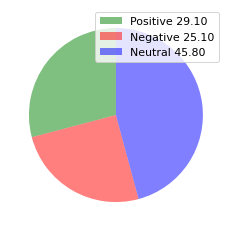

In [ ]:
labels = ['Positive {:}'.format(SentimentsPcent[0]), 'Negative {:}'.format(SentimentsPcent[1]), 'Neutral {:}'.format(SentimentsPcent[2])]
colors = ['g', 'r', 'b']
patches, texts = plt.pie(SentimentsPcent[:3], colors=colors, wedgeprops = {"alpha": 0.5}, startangle=90)
plt.legend(patches, labels, fontsize=11)
plt.show()